In [7]:
import sys
import os
import math
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.fftpack import fft, ifft
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import firwin2,welch

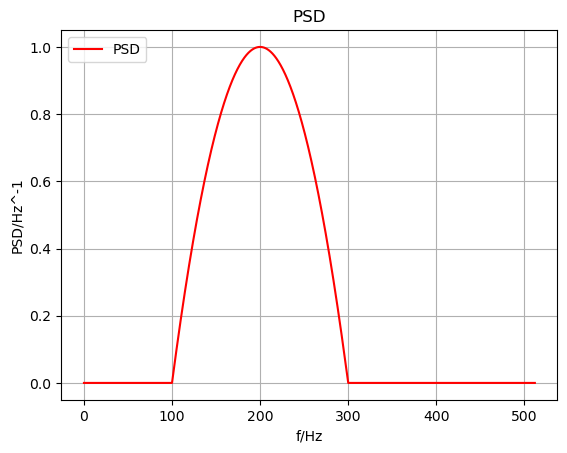

In [8]:
samp_freq=1024
n_samp=16384
time_vec=1/samp_freq*np.arange(0,n_samp,1)
def targetPSD(f):
    out=np.zeros(len(f))
    for i in range(0,len(f)):
        if (100 <= f[i]) and (f[i]<= 300):
            out[i]=(f[i] - 100) * (300 - f[i]) / 10000
        else:
            out[i]=0
    return out
freq=np.arange(0,512.1,0.1)
PSD=targetPSD(freq)
plt.plot(freq,PSD,'r',label="PSD")
plt.grid(True)
plt.xlabel("f/Hz")
plt.ylabel("PSD/Hz^-1")
plt.legend(loc='upper left')
plt.title("PSD")
plt.show()


In [9]:
import numpy as np

def fftfilt(b, x):
    """Use FFT to apply FIR filter defined by b to signal x."""
    # 获取输入信号和滤波器的长度
    N_x = len(x)
    N_b = len(b)
    
    # 计算 FFT 的大小
    N = N_x + N_b - 1
    
    # 计算滤波器和输入信号的 FFT
    X = np.fft.fft(x, N)
    B = np.fft.fft(b, N)
    
    # 乘以滤波器的频率响应
    Y = X * B
    
    # 计算逆 FFT 以获得滤波后的信号
    y = np.fft.ifft(Y)
    
    # 取出中间的部分，与输入信号长度相同
    start = (N_b - 1) // 2
    y = y[start:start + N_x]
    
    # 只取实部（虚部应该非常接近零）
    return np.real(y)

# 示例
b = np.random.randn(500)
x = np.random.randn(16384)
y = fftfilt(b, x)

print(len(y))  # 输出应为 16384


16384


In [10]:
def stat_gauss_noise(n_samp,freq,PSD,flt_ord,samp_freq):
    sqrt_PSD=np.sqrt(PSD)
    sqrt_PSD[-1]=0
    #b=firwin2(flt_ord,freq/(samp_freq/2),sqrt_PSD)
    b=firwin2(flt_ord,freq/(samp_freq/2),sqrt_PSD)
    in_noise=np.random.randn(1,n_samp)
    # print(in_noise.shape,b.shape)
    # print(fftfilt(b,in_noise[0]).shape)
    return np.sqrt(samp_freq)*fftfilt(b,in_noise[0])


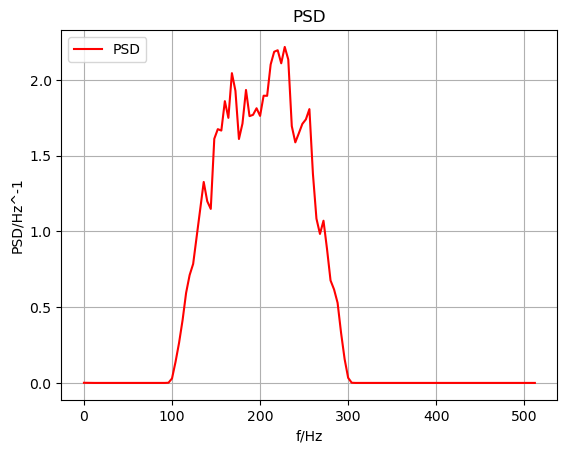

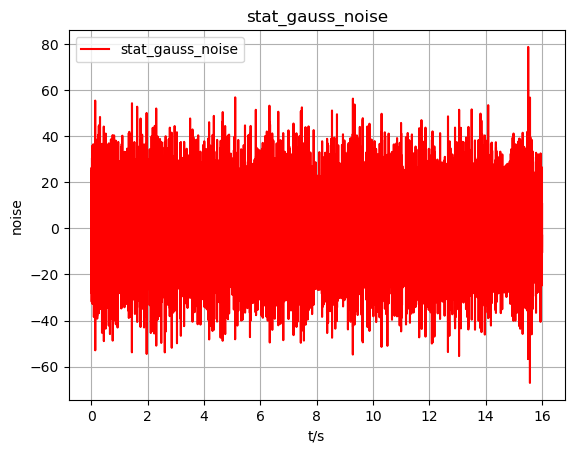

In [11]:
flt_ord=500
out_noise=stat_gauss_noise(n_samp,freq,PSD,flt_ord,samp_freq)
f,Px=welch(out_noise,samp_freq,'hann',256)
f=f.reshape(1,-1)
#print(f.shape,Px.shape)

plt.plot(f[0],Px,'r',label="PSD")
plt.grid(True)
plt.xlabel("f/Hz")
plt.ylabel("PSD/Hz^-1")
plt.legend(loc='upper left')
plt.title("PSD")
plt.show()

#print(out_noise.shape)
plt.plot(time_vec,out_noise,'r',label="stat_gauss_noise")
plt.grid(True)
plt.xlabel("t/s")
plt.ylabel("noise")
plt.legend(loc='upper left')
plt.title("stat_gauss_noise")
plt.show()